### Exponential Long Run Moving Average

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Create a variable called end1 for today. Use the datetime library.
end1 = datetime.date(2025,8,7)
# Create a variable start1 which is 50 days before end1
start1 = end1 - pd.Timedelta(days = 59)
# Use the yfinance library to download the data into a variable df for "Nifty" OHLCV data 
# between start1 and end1.
# The data has to be at 5 minute intervals.
# The download should be into a pandas DataFrame called df
df = yf.download("NVDA",start = start1 , end = end1, interval = '5m',auto_adjust = False)
# Define the desired column order, now including 'Adj Close'
desired_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Filter and reorder columns, handling cases where a column might be missing
df = df[[col for col in desired_columns if col in df.columns]]

# Check the data type, the dimensions, the first few and last few rows of the pandas DataFrame
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())
df1b = df.copy()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
(3162, 6)
Price                            Open        High         Low       Close  \
Ticker                           NVDA        NVDA        NVDA        NVDA   
Datetime                                                                    
2025-06-09 13:30:00+00:00  143.199997  144.699997  143.050003  144.429993   
2025-06-09 13:35:00+00:00  144.440002  144.589996  142.899994  143.125000   
2025-06-09 13:40:00+00:00  143.130005  143.559998  143.039993  143.350006   
2025-06-09 13:45:00+00:00  143.354996  143.880005  143.059998  143.651398   
2025-06-09 13:50:00+00:00  143.649994  143.985001  143.520004  143.940002   

Price                       Adj Close    Volume  
Ticker                           NVDA      NVDA  
Datetime                                         
2025-06-09 13:30:00+00:00  144.429993  16418488  
2025-06-09 13:35:00+00:00  143.125000   5853004  
2025-06-09 13:40:00+00:00  143.350006   3550520  
2025-06-09 13:45:00+00:00  143.6513

In [7]:
df1b.head()

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Datetime,,,,,,
2025-06-09 13:30:00+00:00,143.199997,144.699997,143.050003,144.429993,144.429993,16418488
2025-06-09 13:35:00+00:00,144.440002,144.589996,142.899994,143.125000,143.125000,5853004
2025-06-09 13:40:00+00:00,143.130005,143.559998,143.039993,143.350006,143.350006,3550520
2025-06-09 13:45:00+00:00,143.354996,143.880005,143.059998,143.651398,143.651398,3441472
2025-06-09 13:50:00+00:00,143.649994,143.985001,143.520004,143.940002,143.940002,2395898


## Finding exponential moving average 

In [9]:
ema = 12
df1b['ema'] = df1b["Close"].ewm(span = ema,adjust = False).mean()
print(df1b.head())
print(df1b.tail())

Price                            Open        High         Low       Close  \
Ticker                           NVDA        NVDA        NVDA        NVDA   
Datetime                                                                    
2025-06-09 13:30:00+00:00  143.199997  144.699997  143.050003  144.429993   
2025-06-09 13:35:00+00:00  144.440002  144.589996  142.899994  143.125000   
2025-06-09 13:40:00+00:00  143.130005  143.559998  143.039993  143.350006   
2025-06-09 13:45:00+00:00  143.354996  143.880005  143.059998  143.651398   
2025-06-09 13:50:00+00:00  143.649994  143.985001  143.520004  143.940002   

Price                       Adj Close    Volume         ema  
Ticker                           NVDA      NVDA              
Datetime                                                     
2025-06-09 13:30:00+00:00  144.429993  16418488  144.429993  
2025-06-09 13:35:00+00:00  143.125000   5853004  144.229225  
2025-06-09 13:40:00+00:00  143.350006   3550520  144.093960  
2025-06-09 

In [11]:
df1b.columns

MultiIndex([(     'Open', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (    'Close', 'NVDA'),
            ('Adj Close', 'NVDA'),
            (   'Volume', 'NVDA'),
            (      'ema',     '')],
           names=['Price', 'Ticker'])

### Finding the position according the ema calculated 

In [42]:
df1b[('position','')] = np.where((df1b[('Close',"NVDA")] > df1b[('ema',"")]), 1, 0)
df1b[('position','')] = df1b[('position','')].shift(2)

In [16]:
df1b['position'].value_counts()

position
1.0    1799
0.0    1361
Name: count, dtype: int64

## Finding the Buy & Hold Strategy returns

In [43]:
df1b['cc_returns'] = df1b[("Close","NVDA")].pct_change()

## Finding returns from this strategy

In [44]:
# Create a column called 'strategy_returns' which has the strategy returns over the backtesting period
df1b['strategy_returns'] = df1b['cc_returns'] * df1b['position']

In [36]:
print(df1b.head())
print(df1b.tail())

Price                            Open        High         Low       Close  \
Ticker                           NVDA        NVDA        NVDA        NVDA   
Datetime                                                                    
2025-06-09 13:30:00+00:00  143.199997  144.699997  143.050003  144.429993   
2025-06-09 13:35:00+00:00  144.440002  144.589996  142.899994  143.125000   
2025-06-09 13:40:00+00:00  143.130005  143.559998  143.039993  143.350006   
2025-06-09 13:45:00+00:00  143.354996  143.880005  143.059998  143.651398   
2025-06-09 13:50:00+00:00  143.649994  143.985001  143.520004  143.940002   

Price                       Adj Close    Volume         ema position  \
Ticker                           NVDA      NVDA                        
Datetime                                                               
2025-06-09 13:30:00+00:00  144.429993  16418488  144.429993      NaN   
2025-06-09 13:35:00+00:00  143.125000   5853004  144.229225      NaN   
2025-06-09 13:40:00+00:

In [45]:
df1b['strategy_returns'] = 1 + df1b['strategy_returns']
df1b['cc_returns'] = 1 + df1b['cc_returns']
print('Buy and hold returns: ', np.round(df1b['cc_returns'].cumprod()[-1]-1, 2))
print('Strategy returns: ', np.round(df1b['strategy_returns'].cumprod()[-1]-1, 2))

Buy and hold returns:  0.24
Strategy returns:  0.21


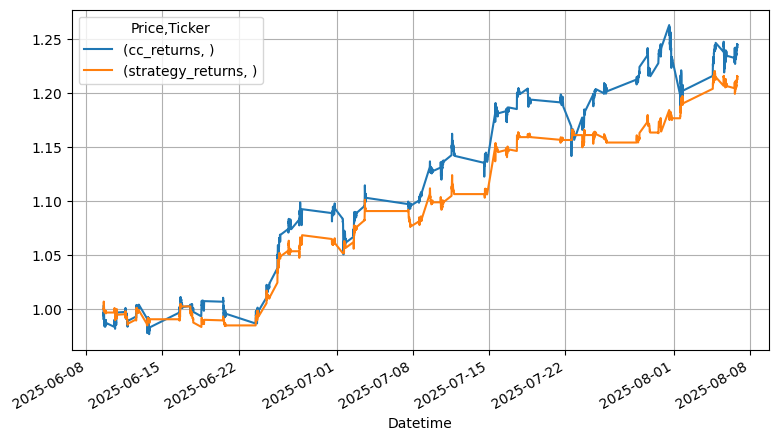

In [46]:
# Plotting the returns for a buy-and-hold approach and the strategy we just created
ax = df1b[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))
ax.figure.savefig("Exponential_Returns.png")